* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-08-31


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   64   51   98   89   92   119  139  275  106  130  212  179   91
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  128  143  209  149   73   141  165  244  136  174  257  140  263,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    64   51   98   89   92  119
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   139  275  106  130  212  179
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    91  128  143  209  149   73
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   141  165  244  136  174  257
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   140  263  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  성북구사랑제일교회  동작구신학교관련  노원구빛가온교회  광화문집회관련  동대문SK탁구장  동작구요양시설  \
 0  3867     388        605        30        28       86         6        6   
 
    영등포구권능교회  성북구체대입시관련  마포구소재 군관련사무실  여의도순복음교회  구로구아파트관련  금천축산업계관련  용인시우리제일교회  \
 0        15         38             7        28        12        22         72   
 
    타 시·도확진자접촉자    기타  경로확인중  
 0          148  1715    

In [5]:
# index the table with covid19 patient data
tables[6]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3867,19855,8.30.,기타,-,확인 중,NaN
1,3866,19897,8.30.,기타,-,확인 중,NaN
2,3865,19900,8.30.,기타,-,확인 중,NaN
3,3864,19788,8.30.,기타,-,확인 중,NaN
4,3863,19797,8.30.,기타,-,확인 중,NaN
...,...,...,...,...,...,...,...
3862,5,9,1.31.,성북구,-,#5 접촉,퇴원
3863,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
3864,3,6,1.30.,종로구,-,#3 접촉,퇴원
3865,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [6]:
# get number of confirmed cases and numbers of columns
df = tables[6]
df.shape

(3867, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3867,19855,8.30.,기타,-,확인 중,NaN
1,3866,19897,8.30.,기타,-,확인 중,NaN
2,3865,19900,8.30.,기타,-,확인 중,NaN
3,3864,19788,8.30.,기타,-,확인 중,NaN
4,3863,19797,8.30.,기타,-,확인 중,NaN


In [8]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'8_30_'

In [9]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_8_30_.csv'

In [10]:
df.to_csv(file_path, index=False)

In [11]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [12]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3867,19855,8.30.,기타,-,확인 중,NaN
1,3866,19897,8.30.,기타,-,확인 중,NaN
2,3865,19900,8.30.,기타,-,확인 중,NaN
3,3864,19788,8.30.,기타,-,확인 중,NaN
4,3863,19797,8.30.,기타,-,확인 중,NaN
5,3862,NaN,8.30.,노원구,-,성북구 사랑제일교회 관련,NaN
6,3861,NaN,8.30.,강서구,-,기타 확진자 접촉,NaN
7,3860,NaN,8.30.,강서구,-,롯데리아 종사자 모임,NaN
8,3859,19936,8.30.,광진구,-,확인 중,NaN
9,3858,19921,8.30.,강동구,-,기타 확진자 접촉,NaN


In [13]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(390, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
2104,1763,14836,8.13.,도봉구,-,기타 확진자 접촉,NaN
942,2925,17547,8.23.,강서구,-,기타 확진자 접촉,NaN
819,3048,17874,8.24.,중랑구,-,기타 확진자 접촉,NaN
970,2897,17438,8.23.,성북구,-,기타 확진자 접촉,NaN
148,3719,19508,8.29.,동작구,-,기타 확진자 접촉,NaN
38,3829,19837,8.30.,송파구,-,기타 확진자 접촉,NaN
158,3709,19651,8.29.,송파구,-,기타 확진자 접촉,NaN
372,3495,19038,8.27.,관악구,-,기타 확진자 접촉,NaN
1697,2170,17319,8.17.,강서구,-,기타 확진자 접촉,NaN
234,3633,19261,8.28.,중구,-,기타 확진자 접촉,NaN


In [14]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.head(5)

number of patients incurred from church: 24%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5,3862,NaN,8.30.,노원구,-,성북구 사랑제일교회 관련,NaN
16,3851,19830,8.30.,구로구,-,영등포구 권능교회,NaN
17,3850,19849,8.30.,노원구,-,노원구 빛가온교회 관련,NaN
20,3847,19854,8.30.,노원구,-,노원구 빛가온교회 관련,NaN
21,3846,19850,8.30.,노원구,-,노원구 빛가온교회 관련,NaN


In [15]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 9%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
16,3851,19830,8.30.,구로구,-,영등포구 권능교회,NaN
17,3850,19849,8.30.,노원구,-,노원구 빛가온교회 관련,NaN
20,3847,19854,8.30.,노원구,-,노원구 빛가온교회 관련,NaN
21,3846,19850,8.30.,노원구,-,노원구 빛가온교회 관련,NaN
22,3845,NaN,8.30.,노원구,-,노원구 빛가온교회 관련,NaN


In [16]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.26.    153
8.18.    151
8.27.    146
8.15.    146
8.22.    140
        ... 
4.19.      1
3.3.       1
4.20.      1
2.6.       1
3.5.       1
Name: 확진일, Length: 192, dtype: int64

In [17]:
df["확진일"].head(4)

0    8.30.
1    8.30.
2    8.30.
3    8.30.
Name: 확진일, dtype: object

In [18]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-08-30
1   2020-08-30
2   2020-08-30
3   2020-08-30
4   2020-08-30
Name: 확진일자, dtype: datetime64[ns]

In [19]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [20]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [21]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3867,19855,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
1,3866,19897,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
2,3865,19900,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30


## Visualization

In [22]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [23]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

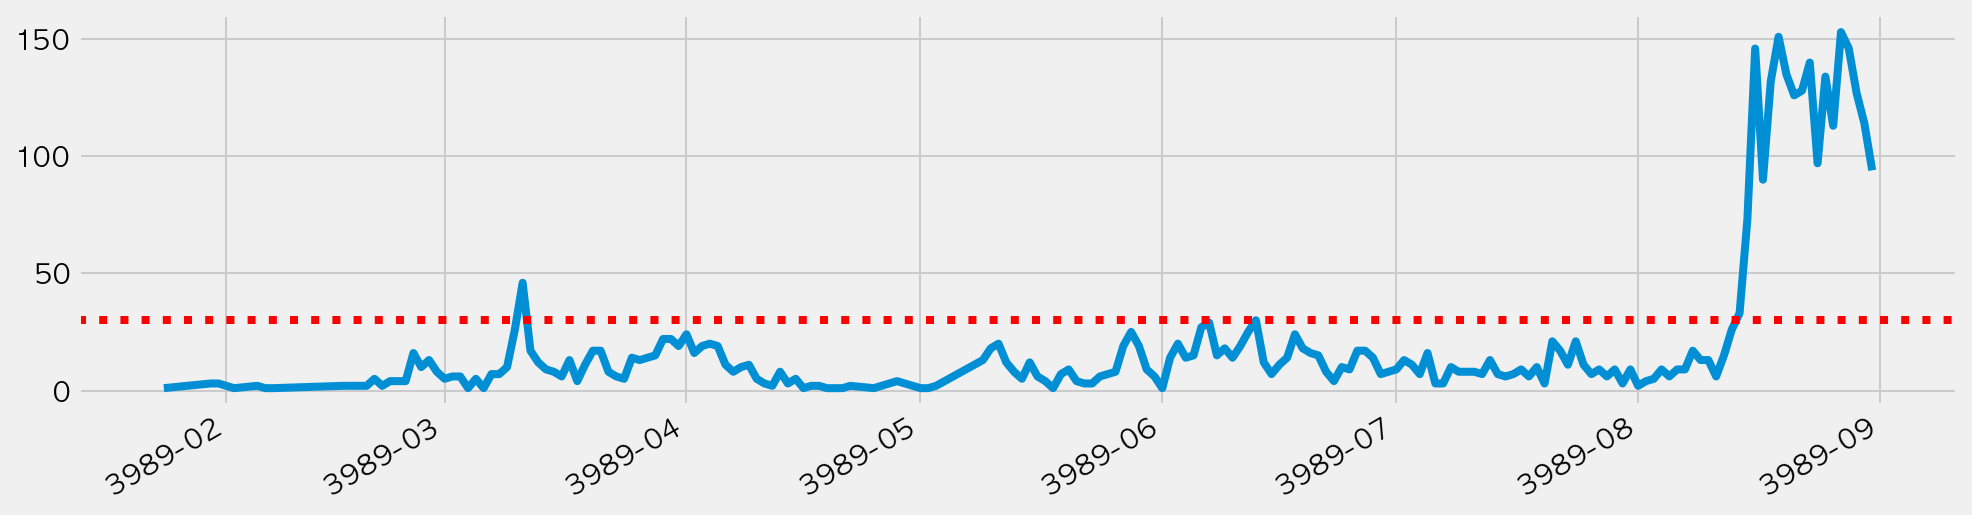

In [24]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [25]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3867,19855,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
1,3866,19897,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
2,3865,19900,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
3,3864,19788,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
4,3863,19797,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
5,3862,NaN,8.30.,노원구,-,성북구 사랑제일교회 관련,NaN,2020-08-30,8,35,08-30
6,3861,NaN,8.30.,강서구,-,기타 확진자 접촉,NaN,2020-08-30,8,35,08-30
7,3860,NaN,8.30.,강서구,-,롯데리아 종사자 모임,NaN,2020-08-30,8,35,08-30
8,3859,19936,8.30.,광진구,-,확인 중,NaN,2020-08-30,8,35,08-30
9,3858,19921,8.30.,강동구,-,기타 확진자 접촉,NaN,2020-08-30,8,35,08-30


In [26]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    191.000000
mean      20.246073
std       33.819913
min        1.000000
25%        5.000000
50%        9.000000
75%       17.000000
max      153.000000
Name: 월일, dtype: float64

In [27]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-21    128
08-22    140
08-23     97
08-24    134
08-25    113
08-26    153
08-27    146
08-28    127
08-29    114
08-30     94
Name: 월일, dtype: int64

In [28]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [29]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
747,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
748,3119,17903,8.24.,성동구,-,광화문집회 관련,NaN,2020-08-24,8,35,08-24
749,3118,17913,8.24.,광진구,-,광화문집회 관련,NaN,2020-08-24,8,35,08-24
750,3117,17876,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
751,3116,17866,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
752,3115,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
753,3114,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
754,3113,미부여,8.24.,기타,-,녹색병원 관련,NaN,2020-08-24,8,35,08-24
755,3112,미부여,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
756,3111,미부여,8.24.,성북구,-,확인 중,NaN,2020-08-24,8,35,08-24


In [30]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 209


array(['확인 중', '성북구 사랑제일교회 관련', '기타 확진자 접촉', '롯데리아 종사자 모임', '타시도확진자 접촉',
       '영등포구 권능교회', '노원구 빛가온교회 관련', '동대문구 sk탁구클럽', 'FA체대입시학원',
       '동작구 소재 서울신학교', '광화문집회 관련', 'JH글로벌 관련', '마포구소재 군관련 사무실',
       '해외 접촉 추정', '동작구 요양시설 관련', '제주 게스트하우스 관련', '동작구 스터디카페',
       '여의도 순복음교회 관련', '구로구 아파트 관련', '중구 보험회사(현대해상)', '순복음 강북교회',
       '용인시 우리제일교회 관련', '중앙보훈병원', '강서구 병원관련', '타시도 확진자 접촉', 'KT가좌지사 관련',
       '종로구 혜화경찰서 관련', '양천구 되새김교회 관련', '현대커머셜', '극단 산 관련', '녹색병원 관련',
       '다래경매 관련', '영등포 IFC몰 오케스트로', '고양시 반석교회(케네디상가) 관련', '롯데 자산개발 관련',
       '골드트레인', '한양대병원', '은평구 헤어콕 관련', '강동구 어린이집', '은평구 성경공부모임',
       '성북구 체대입시 관련', '관악구 요양병원', '고대 안암병원 관련', '마포구 푸본생명콜센터', '성동구 가족관련',
       '용인시 우리제일교회', '골드트레인 관련', '양천구 되새김 교회', '고양시 반석교회(케네디상가)',
       '중구 통일상가', '고양시 반석교회 관련 (케네디상가)', '강남구 판매업소(골드트레인)', '양천구 되새김교회',
       '양천구 확진자 접촉', '영등포구 확진자 접촉', '강남구 확진자 접촉', '강남구 판매업소',
       '광진구 확진자 접촉', '고양시 반석교회 관련(케네디상가)', '구로구 확진자 접촉', '종로구 확진자 접촉',
       '성북구 확진자 접촉', '서초구 확진자 접촉', '마포구 확진자 

In [31]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [32]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [33]:
df["접촉력"].value_counts().head(20)

확인 중             661
성북구 사랑제일교회 관련    605
기타 확진자 접촉        390
해외 접촉 추정         365
이태원 클럽 관련        139
타시도 확진자 접촉       126
리치웨이 관련          119
광화문집회 관련          86
구로구 콜센터 관련        60
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     39
콜센터직원 접촉          37
수도권 개척교회 관련       37
강남구 사무실 관련        36
구로구 아파트 관련        34
용인시 우리제일교회        33
극단 산 관련           30
왕성교회 관련           30
Name: 접촉력, dtype: int64

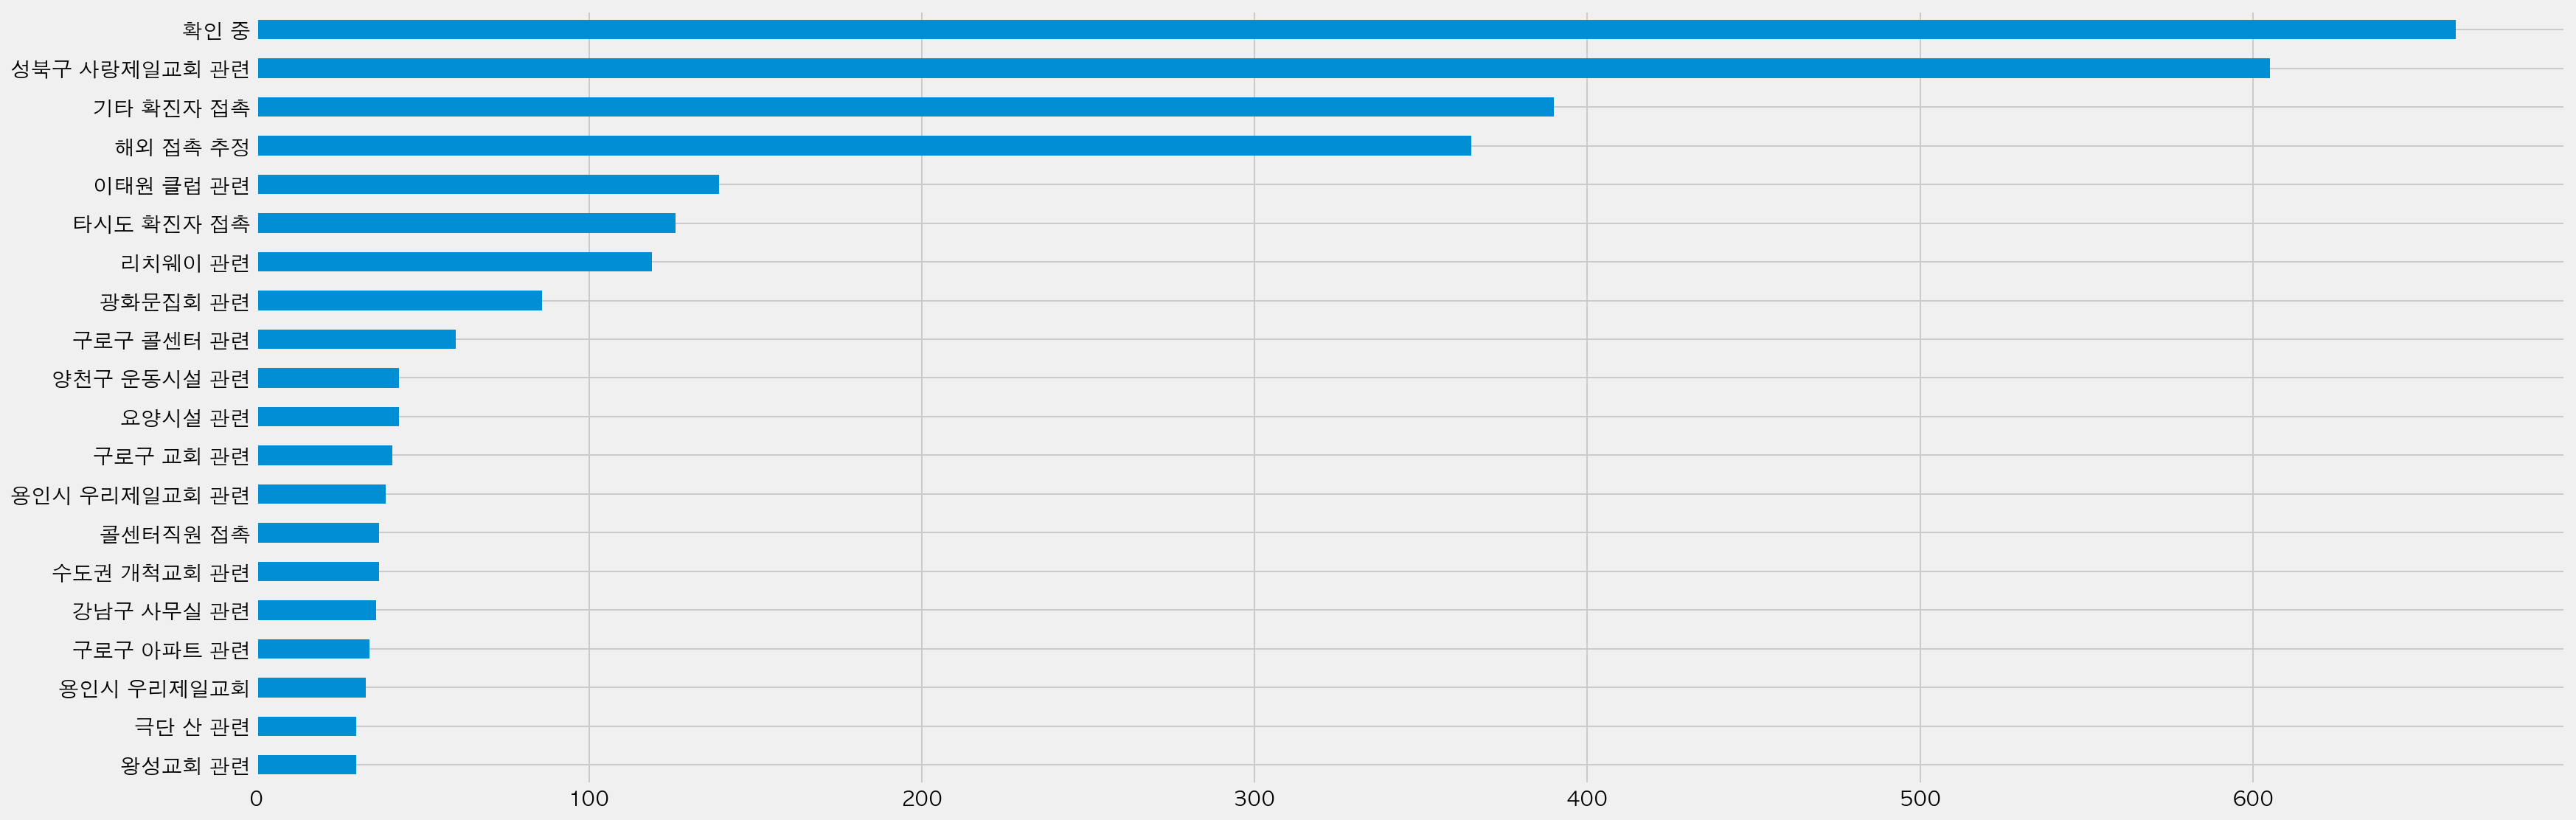

In [34]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [35]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [36]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             661
성북구 사랑제일교회 관련    605
기타 확진자 접촉        390
해외 접촉 추정         365
이태원 클럽 관련        139
타시도 확진자 접촉       126
리치웨이 관련          119
광화문집회 관련          86
구로구 콜센터 관련        60
요양시설 관련           43
양천구 운동시설 관련       43
구로구 교회 관련         41
용인시 우리제일교회 관련     39
콜센터직원 접촉          37
수도권 개척교회 관련       37
Name: 접촉력, dtype: int64

## 감염경로 불명

In [37]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,3867,19855,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
1,3866,19897,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
2,3865,19900,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
3,3864,19788,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
4,3863,19797,8.30.,기타,-,확인 중,NaN,2020-08-30,8,35,08-30
...,...,...,...,...,...,...,...,...,...,...,...
3811,56,1611,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
3825,42,996,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
3828,39,907,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
3829,38,935,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

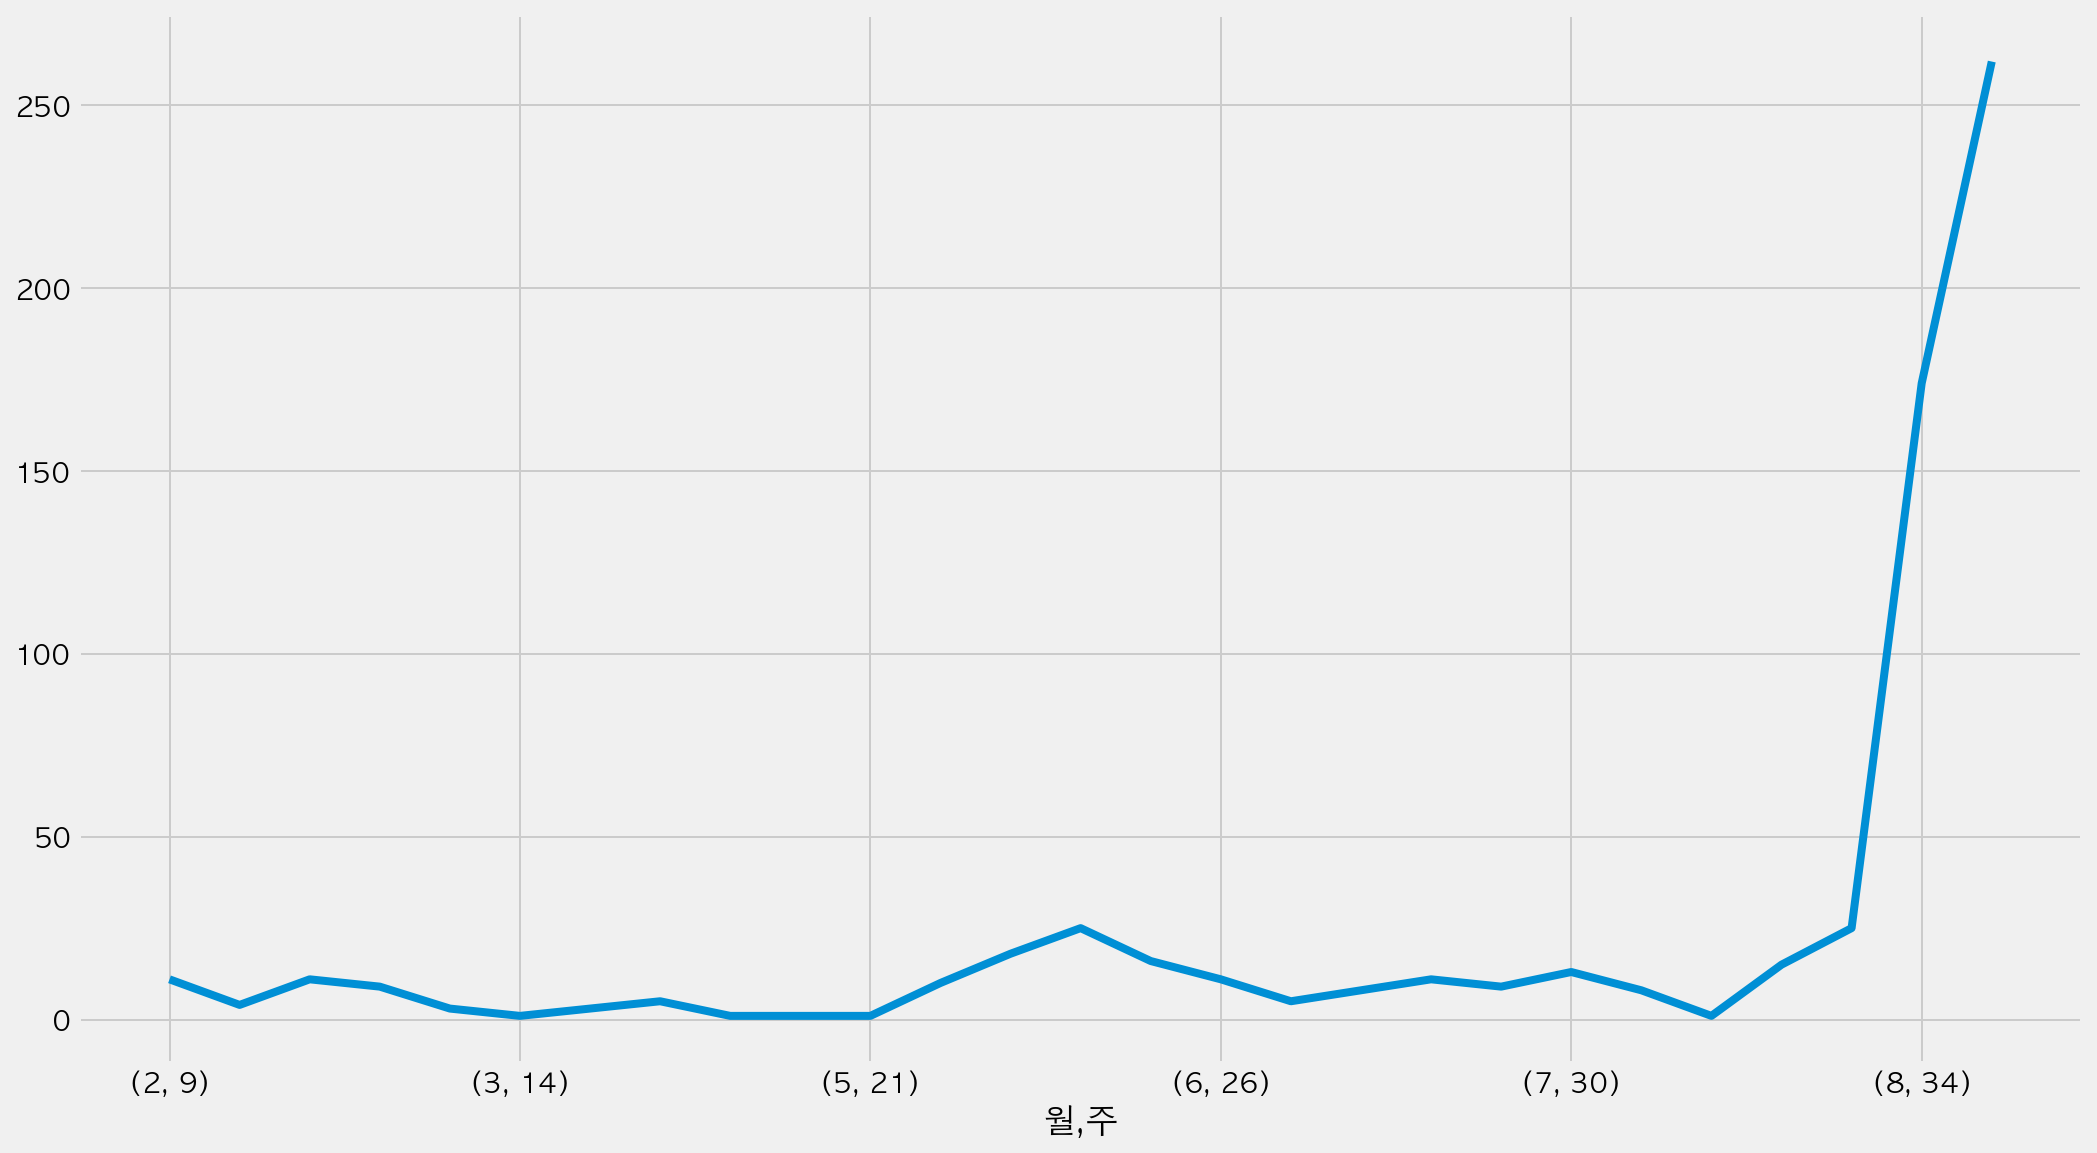

In [38]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [39]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
34,909
35,881
33,389
23,134
14,128


In [40]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,262
34,174
24,25
33,25
23,18


In [41]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [42]:
comparison[-4:]

,전체확진자수,불명확진수
32,76,15
33,389,25
34,909,174
35,881,262


<AxesSubplot:>

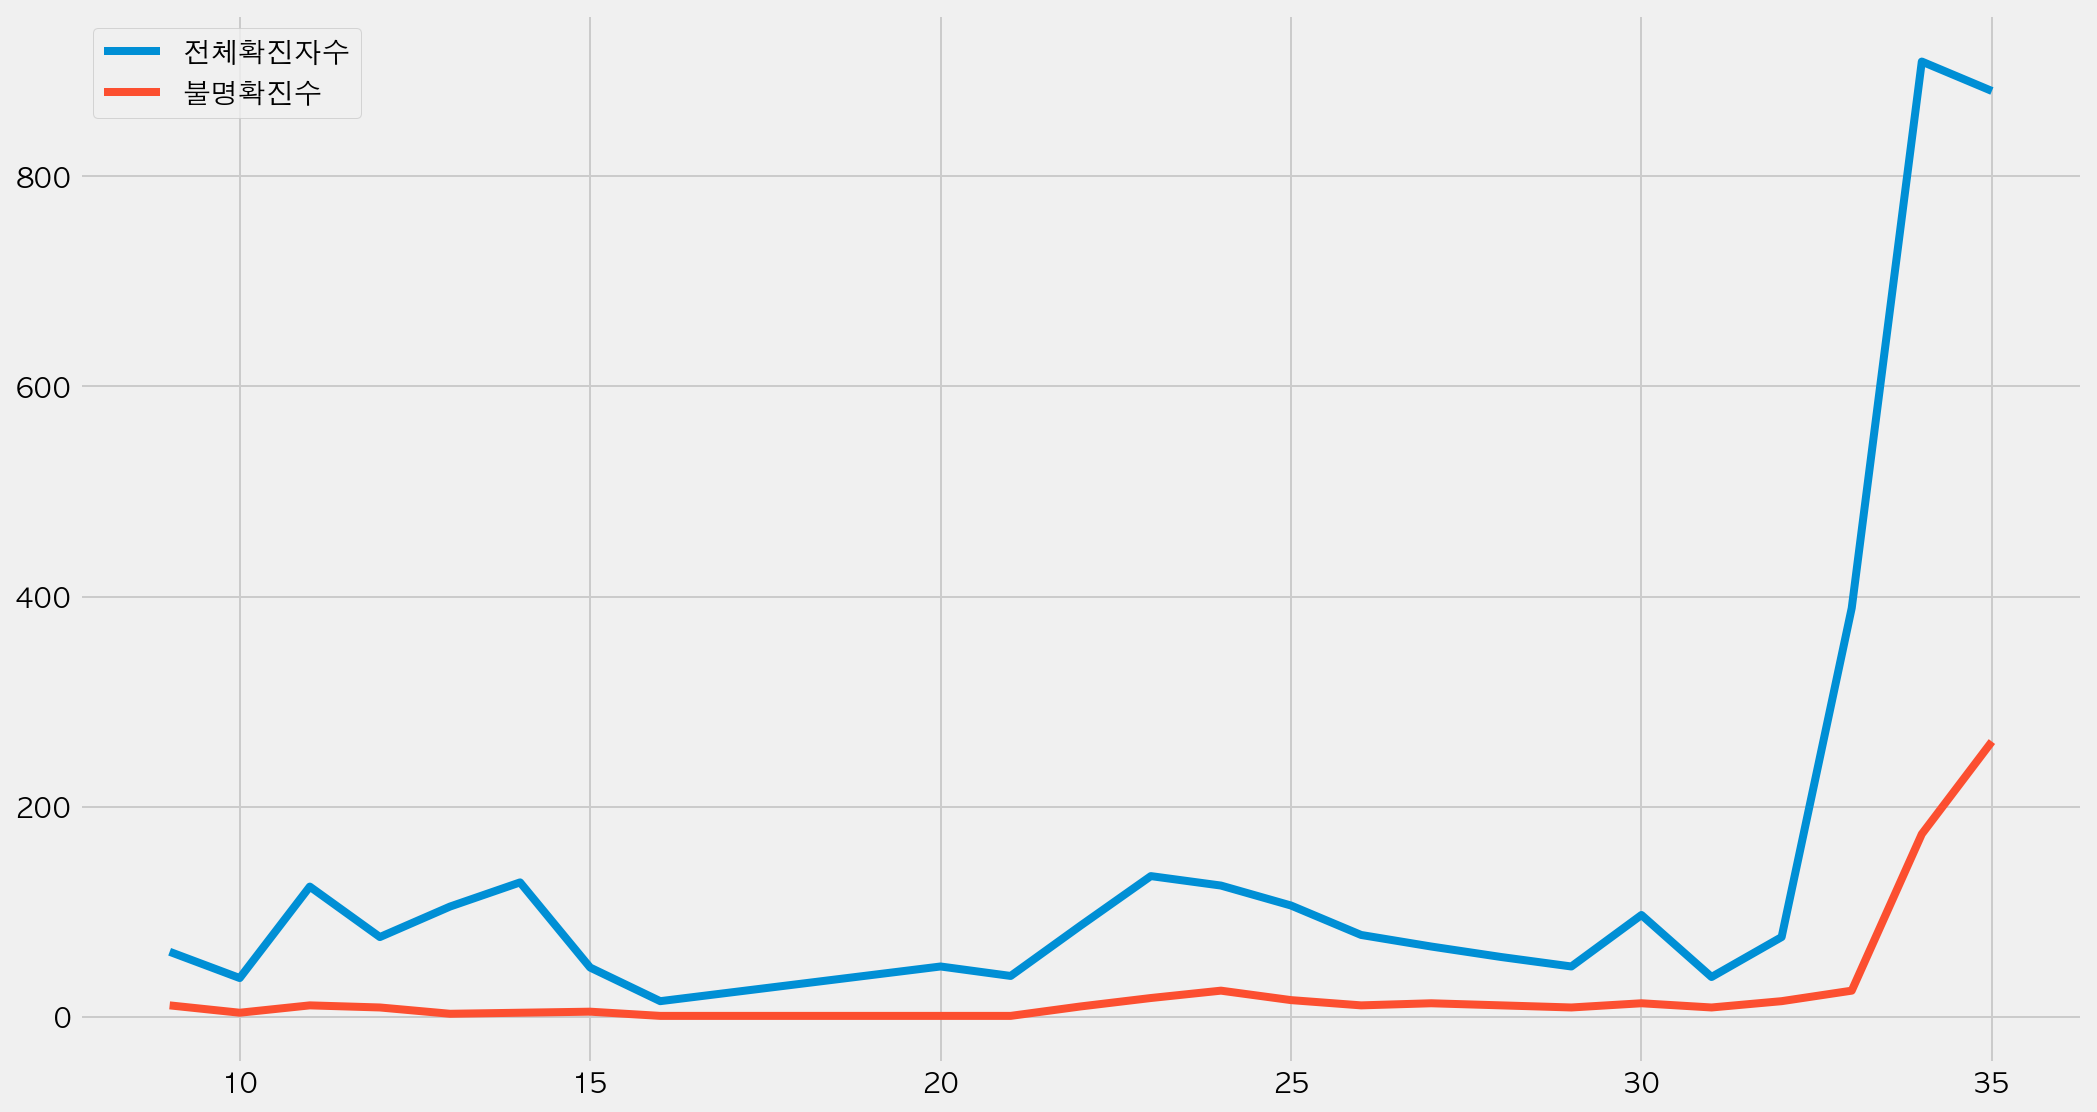

In [43]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [44]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [45]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.426735
34    19.141914
35    29.738933
dtype: float64

In [46]:
percentages[-4:]

32    19.736842
33     6.426735
34    19.141914
35    29.738933
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
19.141914191419144
29.73893303064699


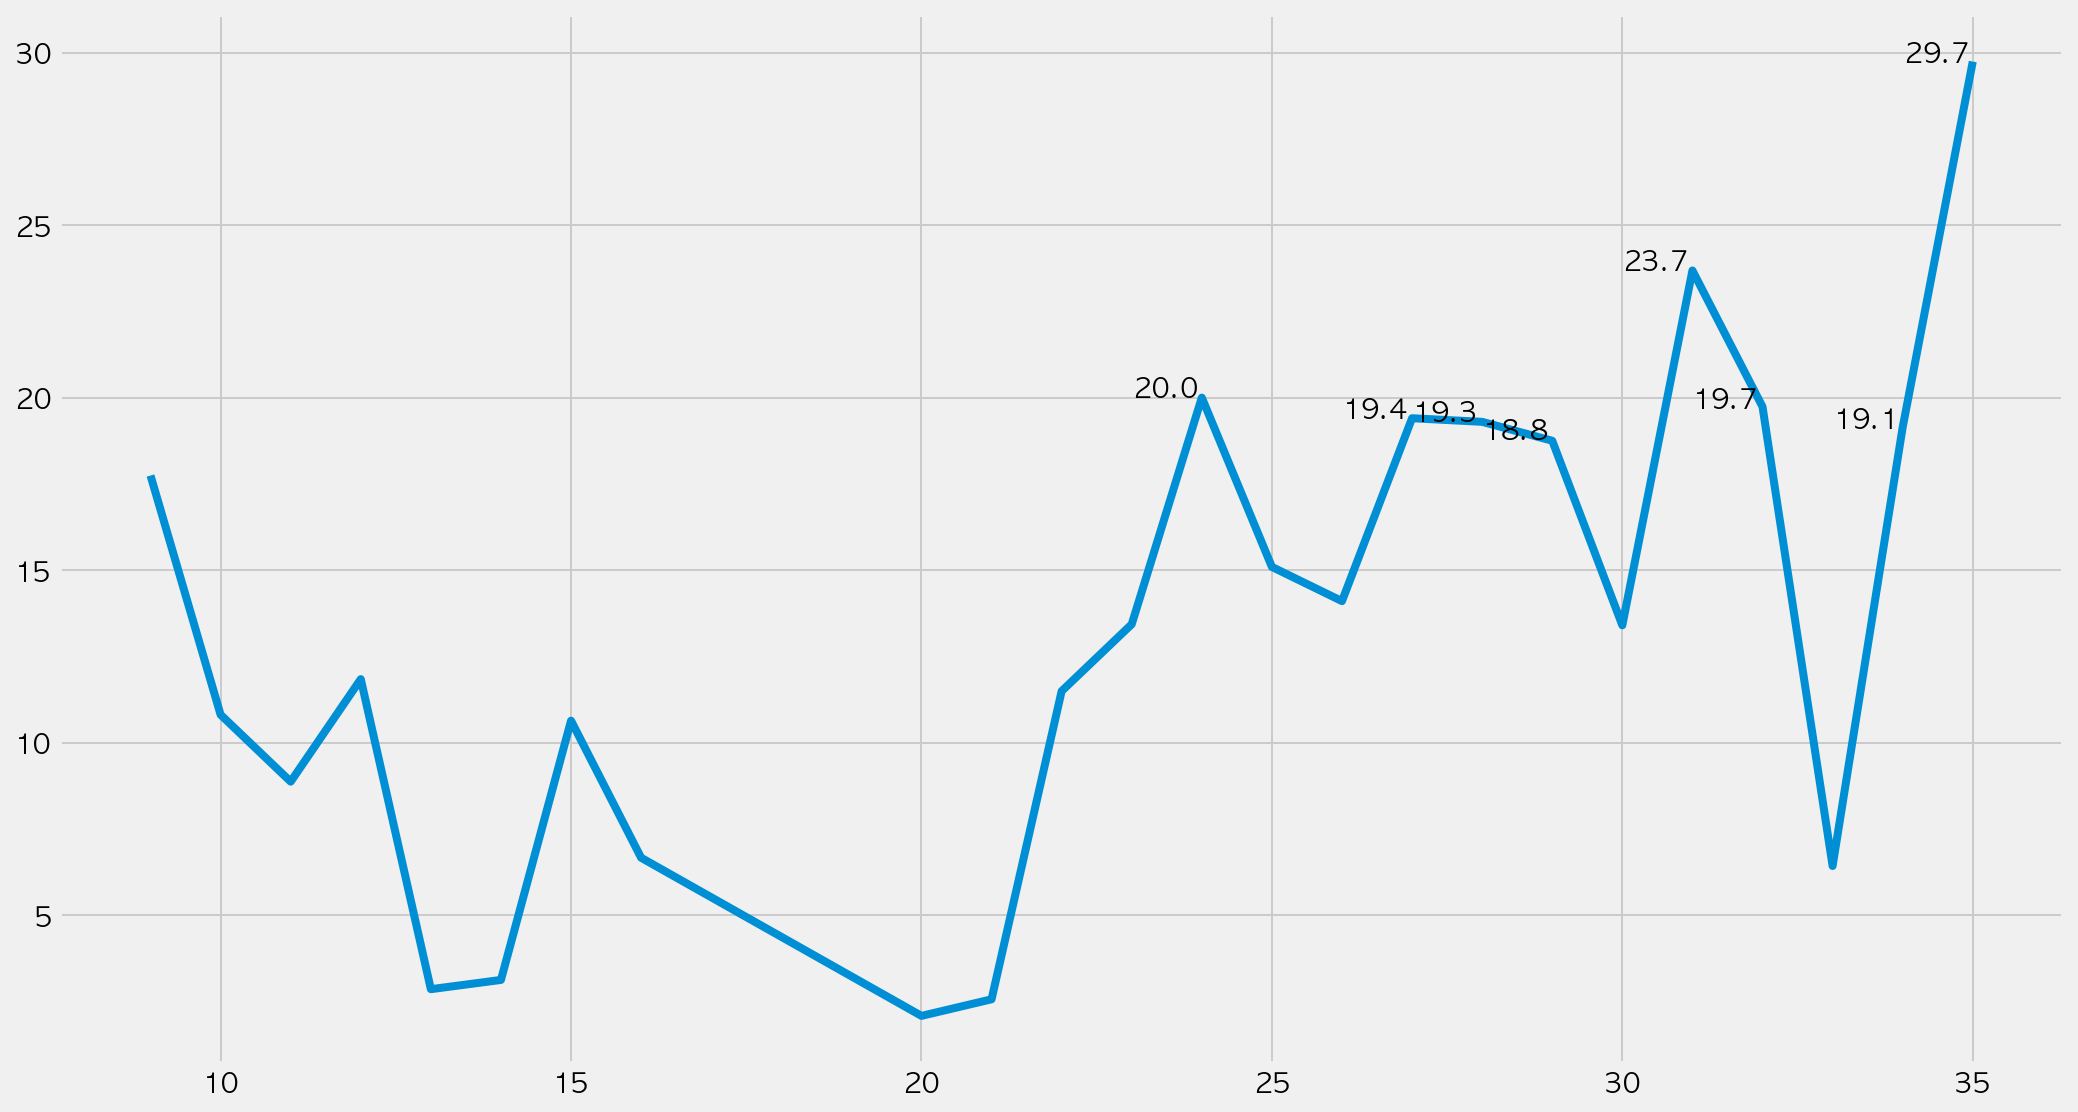

In [47]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [48]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')